# Data  Preprocessing

## Library Imports

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import missingno as msno
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm 
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report,r2_score,confusion_matrix


## Data Imports

In [63]:
heart = pd.read_csv("data.csv")
heart_copy =heart.copy()
heart.head

<bound method NDFrame.head of      age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0     28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1     29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2     29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3     30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4     31    0   2      100  219   0       1     150     0      0.0     ?  ?   
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...   ... ..   
289   52    1   4      160  331   0       0      94     1      2.5     ?  ?   
290   54    0   3      130  294   0       1     100     1      0.0     2  ?   
291   56    1   4      155  342   1       0     150     1      3.0     2  ?   
292   58    0   2      180  393   0       0     110     1      1.0     2  ?   
293   65    1   4      130  275   0       1     115     1      1.0     2  ?   

    thal  num        

## EDA

* Bivariate graph using seaborn

In [64]:
# heart['sex_label'] = heart['sex'].map({0: 'female', 1: 'male'}) #online code
heart_copy['sex'] = heart['sex'].map({0:'female' , 1:'male'})
heart_copy

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,male,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,male,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,male,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,female,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,female,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,male,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,female,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,male,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,female,2,180,393,0,0,110,1,1.0,2,?,7,1


In [65]:
heart.sex.value_counts(),heart["num       "].value_counts()

(sex
 1    213
 0     81
 Name: count, dtype: int64,
 num       
 0    188
 1    106
 Name: count, dtype: int64)

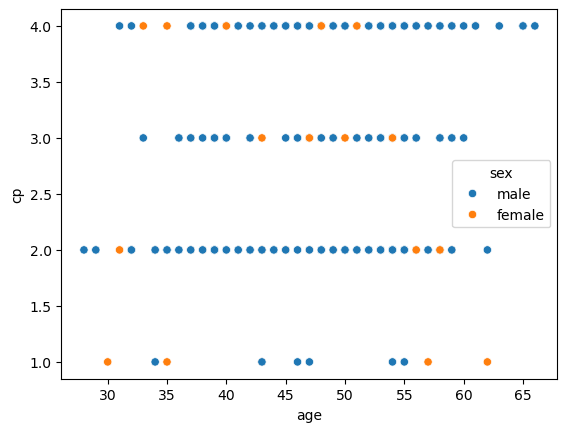

In [66]:
sns.scatterplot(x = 'age',y = 'cp',data = heart_copy,hue = 'sex')
plt.savefig("scatterplot.png")

<Axes: xlabel='age', ylabel='trestbps'>

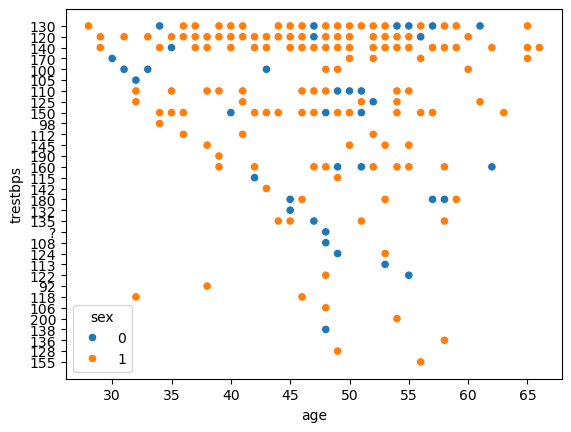

In [67]:
sns.scatterplot(x= "age",y = "trestbps",data = heart,hue = "sex" )

In [68]:
heart.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [69]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [70]:
heart.isnull().sum()#Check total null values in each column

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

* Categorical plot are uses catogrical data

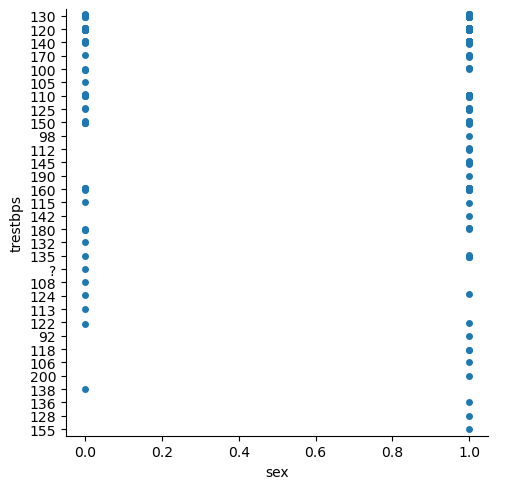

In [71]:
sns.catplot(x= "sex",y = "trestbps",data = heart)

In [72]:
heart_sorted = heart_copy.sort_values(by = "trestbps")
heart_sorted.trestbps

222    100
4      100
105    100
189    100
59     100
      ... 
35     190
245    200
196     92
11      98
90       ?
Name: trestbps, Length: 294, dtype: object

* sorted plotting

<Axes: xlabel='num       ', ylabel='trestbps'>

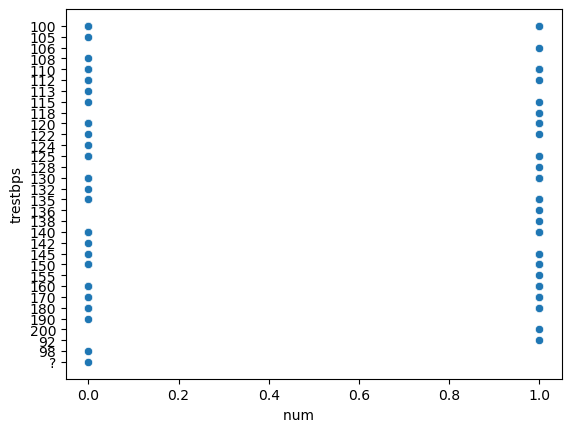

In [73]:
sns.scatterplot(x = heart_sorted['num       '],y = heart_sorted.trestbps )


In [74]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [75]:
heart_copy.drop_duplicates().shape

(293, 14)

In [76]:
heart.describe(),heart_copy.describe()

(              age         sex          cp     oldpeak  num       
 count  294.000000  294.000000  294.000000  294.000000  294.000000
 mean    47.826531    0.724490    2.982993    0.586054    0.360544
 std      7.811812    0.447533    0.965117    0.908648    0.480977
 min     28.000000    0.000000    1.000000    0.000000    0.000000
 25%     42.000000    0.000000    2.000000    0.000000    0.000000
 50%     49.000000    1.000000    3.000000    0.000000    0.000000
 75%     54.000000    1.000000    4.000000    1.000000    1.000000
 max     66.000000    1.000000    4.000000    5.000000    1.000000,
               age          cp     oldpeak  num       
 count  294.000000  294.000000  294.000000  294.000000
 mean    47.826531    2.982993    0.586054    0.360544
 std      7.811812    0.965117    0.908648    0.480977
 min     28.000000    1.000000    0.000000    0.000000
 25%     42.000000    2.000000    0.000000    0.000000
 50%     49.000000    3.000000    0.000000    0.000000
 75%     54

## Handling Missing Values

In [77]:
for val,col in heart.items():
    sumofnan = 0
    sumofq = 0
    if val == val:
        for c in col:
            if c == None:
                sumofnan += 1
            elif c == "?":
                sumofq += 1
        print(f"The {val} has none: {sumofnan} and ?: {sumofq}",'\n')
                

The age has none: 0 and ?: 0 

The sex has none: 0 and ?: 0 

The cp has none: 0 and ?: 0 

The trestbps has none: 0 and ?: 1 

The chol has none: 0 and ?: 23 

The fbs has none: 0 and ?: 8 

The restecg has none: 0 and ?: 1 

The thalach has none: 0 and ?: 1 

The exang has none: 0 and ?: 1 

The oldpeak has none: 0 and ?: 0 

The slope has none: 0 and ?: 190 

The ca has none: 0 and ?: 291 

The thal has none: 0 and ?: 266 

The num        has none: 0 and ?: 0 



* To change value one by one by replace method

In [78]:
heart.trestbps.replace('?',heart.cp.mean(),inplace = True)
heart.slope.replace('?',heart.cp.mean(),inplace = True)

C:\Users\bavit\AppData\Local\Temp\ipykernel_10792\725616963.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart.trestbps.replace('?',heart.cp.mean(),inplace = True)
C:\Users\bavit\AppData\Local\Temp\ipykernel_10792\725616963.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


* To change value totally by replace method

In [79]:
heart.replace('?',heart.cp.mean(),inplace = True)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,2.982993,2.982993,2.982993,0
1,29,1,2,120,243,0,0,160,0,0.0,2.982993,2.982993,2.982993,0
2,29,1,2,140,2.982993,0,0,170,0,0.0,2.982993,2.982993,2.982993,0
3,30,0,1,170,237,0,1,170,0,0.0,2.982993,2.982993,6,0
4,31,0,2,100,219,0,1,150,0,0.0,2.982993,2.982993,2.982993,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,2.982993,2.982993,2.982993,1
290,54,0,3,130,294,0,1,100,1,0.0,2,2.982993,2.982993,1
291,56,1,4,155,342,1,0,150,1,3.0,2,2.982993,2.982993,1
292,58,0,2,180,393,0,0,110,1,1.0,2,2.982993,7,1


In [80]:
heart.isnull().sum() # isnull can be replaced by isna because both means the same

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

<Axes: >

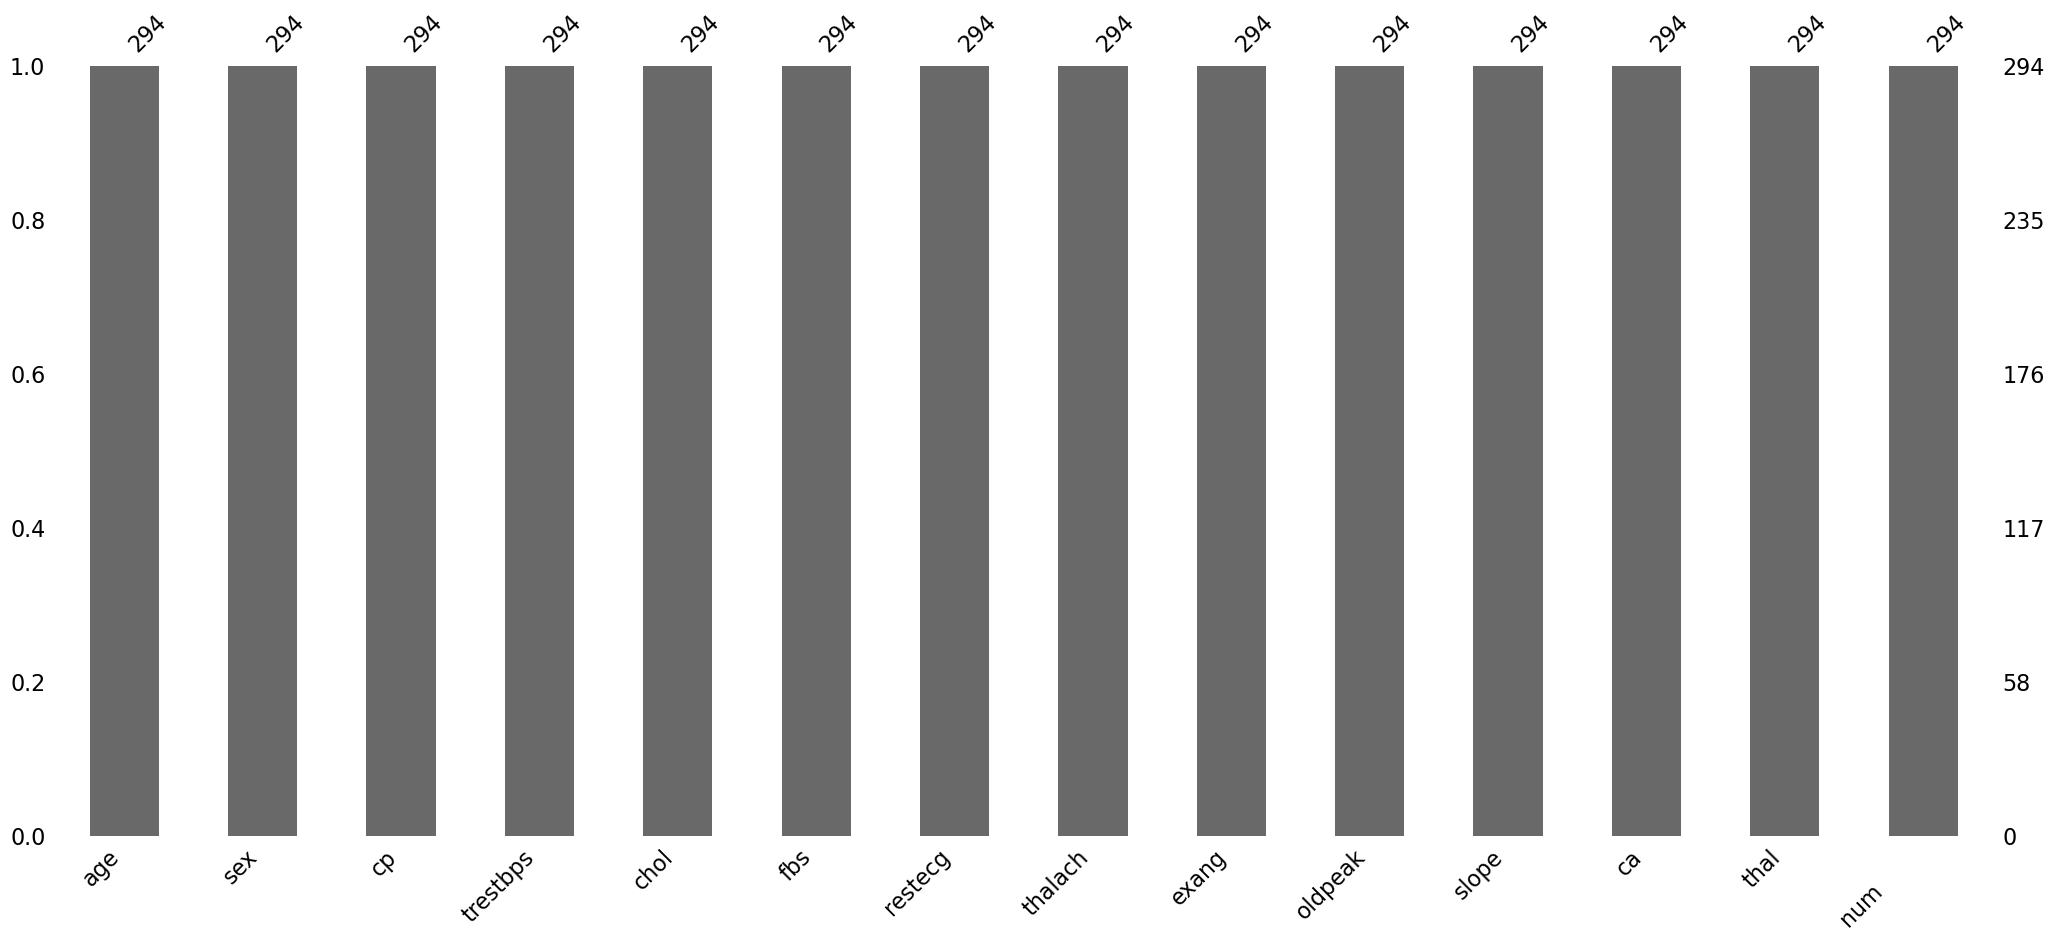

In [81]:
msno.bar(heart)#relate this graph with above data

In [82]:
heart.shape[0],heart.shape[1]

(294, 14)

In [83]:
sum(heart.isna().sum())

0

In [84]:
missing_data = (heart.isna().sum()/heart.shape[0])*100 #Shows how much missing values in each columns
missing_data = pd.DataFrame(missing_data)

In [85]:
string_columns = heart.select_dtypes(include='object').columns
string_columns

Index(['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca',
       'thal'],
      dtype='object')

## Feature Engineering

In [86]:
for i,j in heart.items():
    if i == i:
        i = []
        for k in j:
            if  isinstance(k,str):
                i.append(k)
        print(len(i))
                

0
0
0
293
271
286
293
293
293
0
104
3
28
0


In [87]:
for i in heart.columns:
    heart[i] = heart[i].astype(int)

In [88]:
string_columns = heart.select_dtypes(include='object').columns
len(string_columns)

0

## Handling outliers

<Axes: >

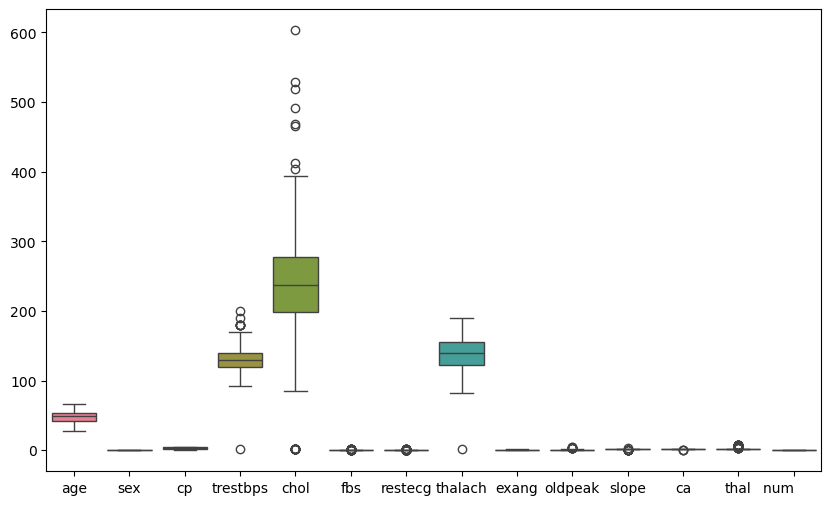

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(heart)

In [90]:
q1 = heart.oldpeak.quantile(0.25)
q1

0.0

In [91]:
q3 = heart.oldpeak.quantile(0.75)
q3

1.0

In [92]:
interquartile_range = q3 - q1
interquartile_range

1.0

In [93]:
lower_bd = q1 - (1.5*interquartile_range)
lower_bd

-1.5

In [94]:
upper_bd = q3 + (1.5*interquartile_range)
upper_bd

2.5

In [95]:
outlier = []
for i in heart.oldpeak:
    if i< lower_bd or i>upper_bd:
        outlier.append(i)
outlier = set(outlier)
outlier = list(outlier)
outlier

[3, 4, 5]

In [96]:
outlier_rpl = heart.oldpeak.mean()
outlier_rpl

0.5476190476190477

In [97]:
heart.oldpeak.replace(outlier,outlier_rpl,inplace=True)   

C:\Users\bavit\AppData\Local\Temp\ipykernel_10792\3239571729.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart.oldpeak.replace(outlier,outlier_rpl,inplace=True)


In [98]:
heart.rename(columns = {'num       ' : 'target'},inplace = True)
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [38]:
heart['target'] = heart["target"].astype(str)
heart.select_dtypes(include = 'object').columns

Index(['target'], dtype='object')

In [39]:
X = heart.drop("target",axis = 1)
y = heart.target

## Data Visualization

<Axes: >

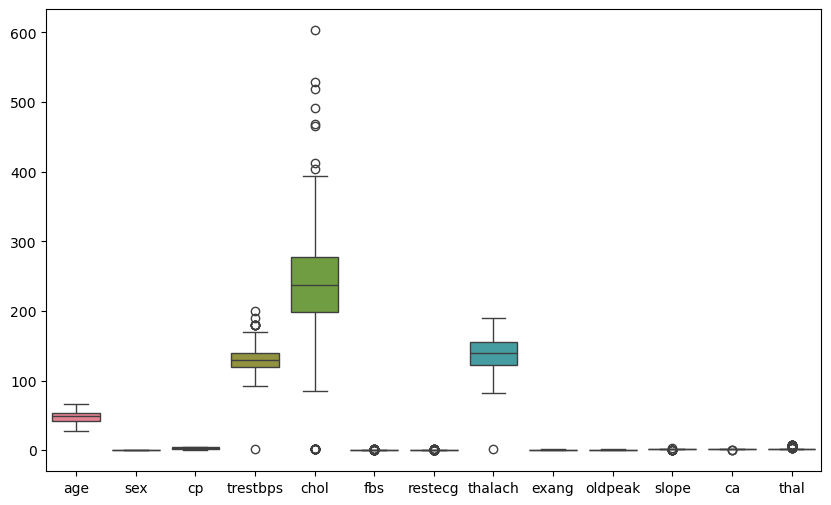

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(heart)

2

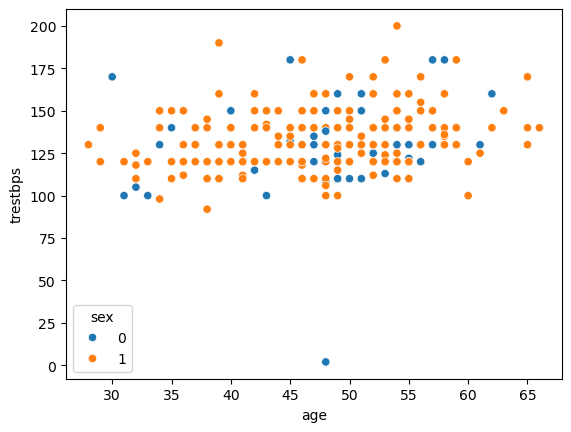

In [41]:
sns.scatterplot(x= "age",y = "trestbps",data = heart,hue = "sex" )
heart.trestbps.min()

In [42]:
w11 = heart.oldpeak.quantile(1.0)
w11,heart.oldpeak.describe()

(2.0,
 count    294.000000
 mean       0.445659
 std        0.686055
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        1.000000
 max        2.000000
 Name: oldpeak, dtype: float64)

131.02380952380952

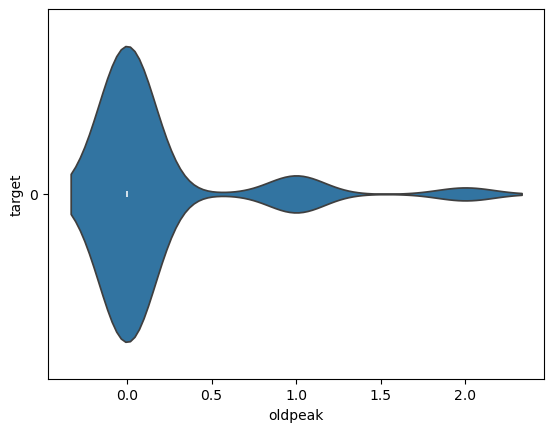

In [43]:
target_0 = heart[heart["target"] == "0"]
sns.violinplot(x = 'oldpeak',y = "target",data = target_0)
sum(heart.oldpeak)

# Model Building

## Train Test Split

In [44]:
heart.shape,len(heart)

((294, 14), 294)

In [45]:
# percentage30 = int((30*294)/100)+1
# percentage70 = int((70*294)/100)
# print(percentage30,percentage70,percentage30+percentage70)

<b>Basic train test split code</b>

<b>With Random state</b>

In [46]:
test_size = 0.2
random_state = 10
def manualTts(X,y,test_size = 0.3,random_state = None):
    if random_state:
        np.random.seed(random_state)
    
    shuffled_indices = np.random.permutation(len(X))
    test_size = int(len(X)*test_size)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    x_train = X.iloc[test_size:]
    x_test = X.iloc[:test_size]
    y_train = y.iloc[test_size:]
    y_test = y.iloc[:test_size]
    return x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test = manualTts(X,y,test_size,random_state)

<b>Without Random State</b>

In [47]:
# def manualTts(X,y,test_size = 0.3):
#     test_size = int(len(X)*test_size)t
#     x_train = X.iloc[test_size:]
#     # x_train =np.random.permutation(x_train)
#     x_test = X.iloc[:test_size]
#     y_train = y.iloc[test_size:]
#     y_test = y.iloc[:test_size]
#     return x_train,x_test,y_train,y_test
# x_train,x_test,y_train,y_test = manualTts(X,y,test_size)
# y_train.shape,y_test.shape
# # print(x_train)

In [48]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((236, 13), (58, 13), (236,), (58,))

In [49]:
y_train.tail()

289    1
290    1
291    1
292    1
293    1
Name: target, dtype: object

* Proer train test split by using library

In [50]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train.shape,X_test.shape,y_train.shape,y_test.shape

## Model Initialization

In [51]:
model = {
    "KNN Algorithm" : KNeighborsClassifier(),
    "Logistic Regression" : LogisticRegression(max_iter=1000),
    "Multinomial Naive-Bayes" : MultinomialNB()
}

## Model Training

In [52]:
def fitModel(X_train, X_test, y_train, y_test, model):
    accuracy_result = {}
    for name,model_name in tqdm(model.items()):
        model_name.fit(X_train,y_train)
        y_pred = model_name.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        accuracy_result[name] = {
            "Accuracy" : accuracy
        }

    return accuracy_result,y_pred
            

In [53]:
accuracy_result,pred = fitModel(x_train, x_test, y_train, y_test, model)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 21.47it/s]


In [54]:
# knn_model.fit(X_train,y_train)

In [55]:
accuracy_result

{'KNN Algorithm': {'Accuracy': 0.6896551724137931},
 'Logistic Regression': {'Accuracy': 0.8275862068965517},
 'Multinomial Naive-Bayes': {'Accuracy': 0.6724137931034483}}

## Hyper Parameter Tunning

# Evaluation and Result

In [56]:
for ModelName,ModelValue in accuracy_result.items():
    print(ModelName,"----->",ModelValue )

KNN Algorithm -----> {'Accuracy': 0.6896551724137931}
Logistic Regression -----> {'Accuracy': 0.8275862068965517}
Multinomial Naive-Bayes -----> {'Accuracy': 0.6724137931034483}


In [57]:
# y_pred = knn_model.predict(X_test)
# y_pred

In [58]:
# accuracy = accuracy_score(y_test, y_pred)
# accuracy

In [59]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6724137931034483
[[39 19]
 [ 0  0]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        58
           1       0.00      0.00      0.00         0

    accuracy                           0.67        58
   macro avg       0.50      0.34      0.40        58
weighted avg       1.00      0.67      0.80        58



C:\Users\bavit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bavit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bavit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Confusion Matrix')

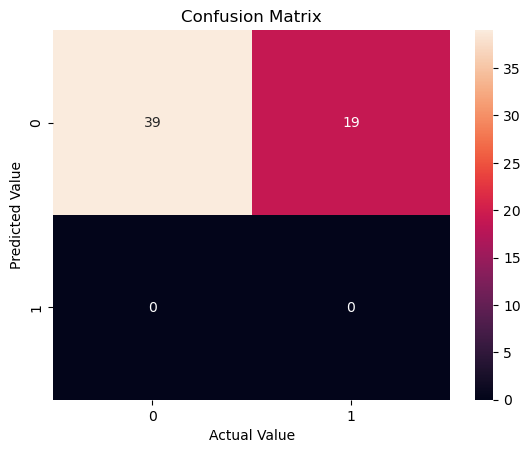

In [60]:
Conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(Conf_matrix,annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Confusion Matrix")